In [1]:
from skneuromsi.neural import Cuppini2017
from skneuromsi.neural import Paredes2022

import numpy as np

## TEMPORAL DATA

temporal_dis = (
    np.array(
        [
            -0.7,
            -0.5,
            -0.3,
            -0.25,
            -0.2,
            -0.15,
            -0.1,
            -0.08,
            -0.05,
            -0.02,
            -0.01,
            0.0,
            0.01,
            0.02,
            0.05,
            0.08,
            0.1,
            0.15,
            0.2,
            0.25,
            0.3,
            0.5,
            0.7,
        ]
    )
    * 1000
)

temporal_causes_data = np.array(
    [
        0.03154762,
        0.03214286,
        0.07619048,
        0.19699793,
        0.30345238,
        0.50193093,
        0.72754579,
        0.82582418,
        0.90882784,
        0.93468864,
        0.97271062,
        0.97710623,
        0.95398352,
        0.94500916,
        0.94871795,
        0.94787546,
        0.92052078,
        0.87787546,
        0.75857143,
        0.51714286,
        0.33121212,
        0.05779221,
        0.02836439,
    ]
)

temporal_causes_data_short = temporal_causes_data[6:-4]


def temporal_cuppini2017_causes_job(a_onset, a_tau, v_tau, m_tau, ff_weight, cm_weight):

    v_onset = 110

    model = Paredes2022(
        neurons=10,
        position_range=(0, 10),
        position_res=1,
        time_range=(0, 325),
        tau=(a_tau, v_tau, m_tau),
    )

    res = model.run(
        feedforward_weight=ff_weight,
        cross_modal_weight=cm_weight,
        noise=False,
        causes_kind="prob",
        causes_dim="time",
        auditory_stim_n=1,
        visual_stim_n=1,
        auditory_duration=6,
        visual_duration=6,
        auditory_onset=a_onset,
        visual_onset=v_onset,
        causes_peak_threshold=0.15,
    )
    prob_causes = res.causes_

    return prob_causes, res


def temporal_cuppini2017_causes_cost(theta):
    v_onset = 110
    causes = []
    for a_onset in v_onset + temporal_dis[6:-4]:
        prob_causes_per_a_onset = temporal_cuppini2017_causes_job(
            a_onset, theta[0], theta[1], theta[2], theta[3], theta[4]
        )
        causes.append(prob_causes_per_a_onset)

    model_data = np.array(causes)
    exp_data = temporal_causes_data_short

    cost = np.sum(np.square(np.divide(exp_data - model_data, exp_data)))

    return cost


# cost = temporal_cuppini2017_causes_cost((75,75,75,100,100))
# print(cost)

job_res = temporal_cuppini2017_causes_job(
    120, 12.6680816, 29.01034606, 19.43921916, 82.20185933, 10.48092051
)
job_res

(0.0,
 <NDResult 'Paredes2022', modes=['auditory' 'visual' 'multi'], times=32500, positions=10, positions_coordinates=1, causes=0.0>)

array([<Axes: title={'center': 'x0'}, xlabel='times', ylabel='values'>],
      dtype=object)

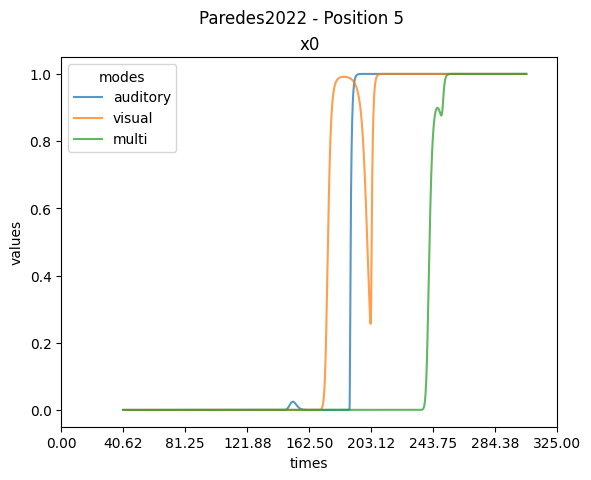

In [2]:
job_res[1].plot.linet()

In [4]:
import numpy as np

res = np.load("Cuppini_2017_temporal_fit_res_pars.npy")
res[0]

15.14327227484819

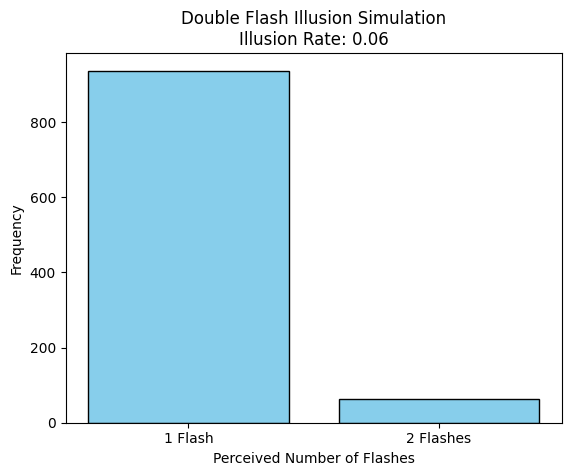

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set parameters
num_trials = 1000  # Number of simulated trials
sigma_v = 1.2  # Noise in visual system (higher noise than auditory)
sigma_a = 0.5  # Noise in auditory system (lower noise, more reliable)
prior_C1 = 0.8  # Prior belief that vision and audition share a common cause

# True stimulus (1 visual flash, 2 auditory beeps)
true_flashes = 1
true_beeps = 2

# Simulated noisy observations
x_v = true_flashes + np.random.normal(0, sigma_v, num_trials)
x_a = true_beeps + np.random.normal(0, sigma_a, num_trials)

# Likelihoods
likelihood_C1 = norm.pdf(x_v - x_a, 0, sigma_v)  # If C=1, expect x_v ≈ x_a
likelihood_C2 = norm.pdf(x_v, true_flashes, sigma_v) * norm.pdf(
    x_a, true_beeps, sigma_a
)  # Independent perception

# Compute posterior probabilities using Bayes' rule
posterior_C1 = (likelihood_C1 * prior_C1) / (
    likelihood_C1 * prior_C1 + likelihood_C2 * (1 - prior_C1)
)
posterior_C2 = 1 - posterior_C1

# Decision rule: If P(C=1) > 0.5, perceive 1 flash; otherwise, perceive 2 flashes
perceived_flashes = np.where(posterior_C1 > 0.5, 1, 2)

# Compute illusion rate
illusion_rate = np.mean(perceived_flashes == 2)

# Plot results
plt.hist(
    perceived_flashes,
    bins=[0.5, 1.5, 2.5],
    rwidth=0.8,
    color="skyblue",
    edgecolor="black",
)
plt.xticks([1, 2], ["1 Flash", "2 Flashes"])
plt.xlabel("Perceived Number of Flashes")
plt.ylabel("Frequency")
plt.title(f"Double Flash Illusion Simulation\nIllusion Rate: {illusion_rate:.2f}")
plt.show()